In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import requests

In [2]:
url = 'https://github.com/1010code/iris-dnn-tensorflow/raw/master/data/Iris.csv'
s=requests.get(url).content
df_train=pd.read_csv(io.StringIO(s.decode('utf-8')))
df_train = df_train.drop(labels=['Id'],axis=1) # 移除Id
df_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
label_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
#將編碼後的label map存至df_train['Species']中。
df_train['Class'] = df_train['Species'].map(label_map)
df_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Class
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


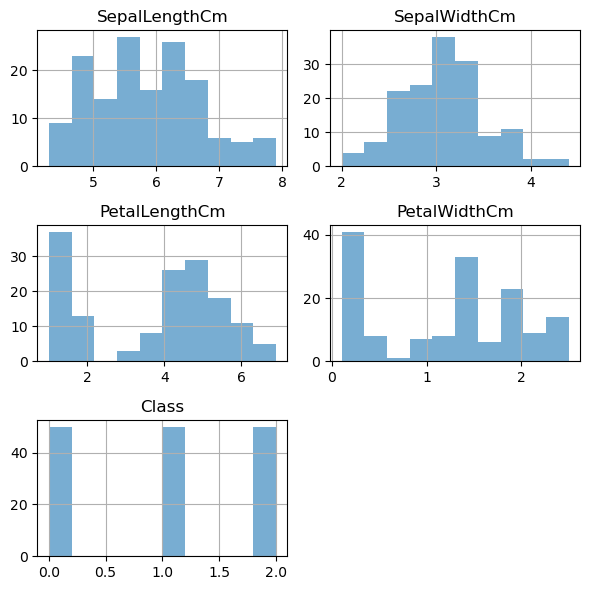

In [4]:
df_train.hist(alpha=0.6, figsize=(6, 6)) 
plt.tight_layout()
plt.show()

array([[<Axes: xlabel='SepalLengthCm', ylabel='SepalLengthCm'>,
        <Axes: xlabel='SepalWidthCm', ylabel='SepalLengthCm'>,
        <Axes: xlabel='PetalLengthCm', ylabel='SepalLengthCm'>,
        <Axes: xlabel='PetalWidthCm', ylabel='SepalLengthCm'>,
        <Axes: xlabel='Class', ylabel='SepalLengthCm'>],
       [<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>,
        <Axes: xlabel='SepalWidthCm', ylabel='SepalWidthCm'>,
        <Axes: xlabel='PetalLengthCm', ylabel='SepalWidthCm'>,
        <Axes: xlabel='PetalWidthCm', ylabel='SepalWidthCm'>,
        <Axes: xlabel='Class', ylabel='SepalWidthCm'>],
       [<Axes: xlabel='SepalLengthCm', ylabel='PetalLengthCm'>,
        <Axes: xlabel='SepalWidthCm', ylabel='PetalLengthCm'>,
        <Axes: xlabel='PetalLengthCm', ylabel='PetalLengthCm'>,
        <Axes: xlabel='PetalWidthCm', ylabel='PetalLengthCm'>,
        <Axes: xlabel='Class', ylabel='PetalLengthCm'>],
       [<Axes: xlabel='SepalLengthCm', ylabel='PetalWidthCm'>,
        <

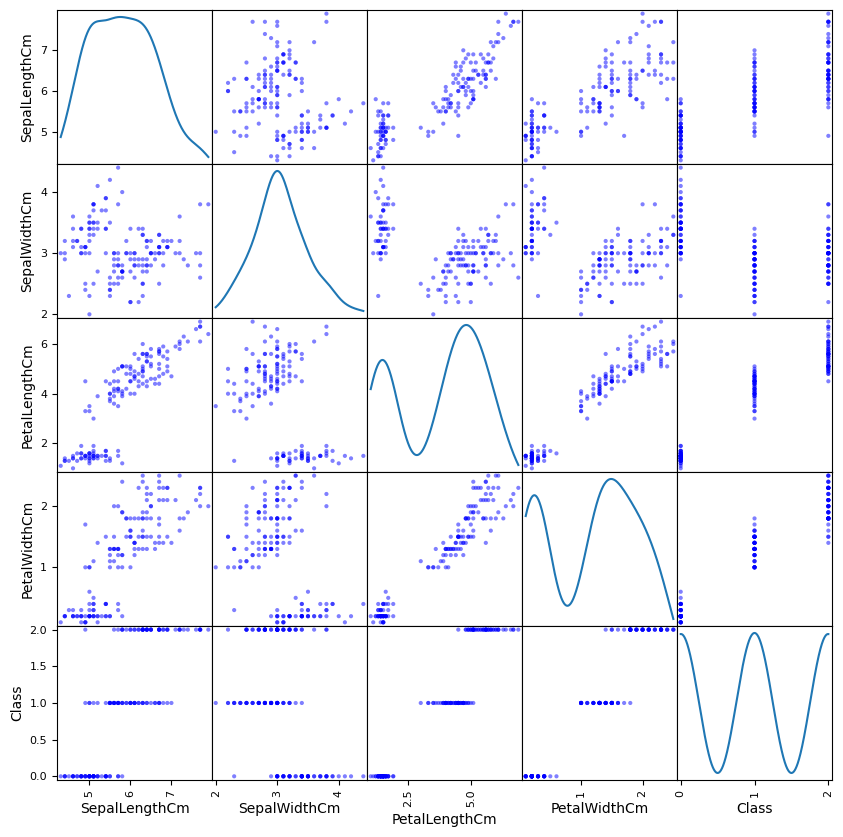

In [5]:
from pandas.plotting import scatter_matrix
scatter_matrix( df_train,figsize=(10, 10),color='b',diagonal='kde')

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

# Create a random dataset with two peaks
np.random.seed(0)
data = np.concatenate([np.random.normal(0, 1, 500), np.random.normal(4, 1, 500)])

# Create a range of values for which we want to estimate the density
x = np.linspace(-3, 8, 1000)

# Fit the KDE model to the data
kde = KernelDensity(bandwidth=0.5, kernel='gaussian')
kde.fit(data[:, np.newaxis])

# Estimate the density for the range of values
log_density = kde.score_samples(x[:, np.newaxis])

# Plot the data and KDE estimate
plt.figure(figsize=(8, 6))
plt.hist(data, bins=30, density=True, alpha=0.5, color='blue', label='Data Histogram')
plt.plot(x, np.exp(log_density), color='red', lw=2, label='KDE Estimate')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.title('Kernel Density Estimation Example')
plt.show()

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
import numpy as np

# Set the random seed to a specific value (e.g., 0)
np.random.seed(0)

# Generate random numbers
random_numbers = np.random.rand(5)  # Generate 5 random numbers between 0 and 1

print(random_numbers)

In [15]:
#线性同余生成器（Linear Congruential Generator，LCG）是一种常见的伪随机数生成算法，其基本原理是通过线性递推的方式生成伪随机数序列。
#LCG 算法的核心思想是不断地将当前的随机数乘以一个固定的倍数，然后加上一个固定的偏移量，再取模以得到下一个随机数。

#初始化：选择初始种子（一个正整数），记为 X0。
#生成随机数：根据以下公式计算下一个随机数 Xn+1：

#  Xn+1 = (a * Xn + c) % m
#其中，a 是一个乘数（大于0且小于 m）、c 是一个增量（大于等于0且小于 m）、m 是模数（大于0），Xn 是当前的随机数。
#LCG 算法的性质取决于选择的参数（a、c、m）以及初始种子 X0。正确选择参数和种子可以得到满足随机性要求的伪随机数序列。
#然而，不恰当的参数选择可能导致生成的随机数不够随机，因此参数的选择是至关重要的。

class LinearCongruentialGenerator:
    def __init__(self, seed, a, c, m):
        self.state = seed
        self.a = a
        self.c = c
        self.m = m

    def generate(self):
        self.state = (self.a * self.state + self.c) % self.m
        return self.state

# 使用示例
lcg = LinearCongruentialGenerator(seed=42, a=1664525, c=1013904223, m=2**32)
for _ in range(10):
    print(lcg.generate())

1083814273
378494188
2479403867
955863294
1613448261
110225632
1921058495
508781842
3753001289
4271921684


In [19]:
import random

# 生成随机浮点数
random_float = random.random()
print("Random Float:", random_float)

# 生成随机整数
random_integer = random.randint(1, 100)
print("Random Integer:", random_integer)

Random Float: 0.0554612324298126
Random Integer: 61


In [20]:
#梅森旋转算法（Mersenne Twister）

class MersenneTwister:
    def __init__(self, seed=5489):
        self.state = [0] * 624
        self.index = 0
        self.state[0] = seed
        for i in range(1, 624):
            self.state[i] = (1812433253 * (self.state[i - 1] ^ (self.state[i - 1] >> 30)) + i) & 0xFFFFFFFF

    def _generate_numbers(self):
        for i in range(624):
            y = (self.state[i] & 0x80000000) + (self.state[(i + 1) % 624] & 0x7fffffff)
            self.state[i] = self.state[(i + 397) % 624] ^ (y >> 1)
            if y % 2 != 0:
                self.state[i] ^= 0x9908b0df

    def random(self):
        if self.index == 0:
            self._generate_numbers()
        y = self.state[self.index]
        y ^= (y >> 11)
        y ^= ((y << 7) & 0x9d2c5680)
        y ^= ((y << 15) & 0xefc60000)
        y ^= (y >> 18)
        self.index = (self.index + 1) % 624
        return y / 0xFFFFFFFF

if __name__ == "__main__":
    mt = MersenneTwister(seed=5489)
    for _ in range(10):
        random_number = mt.random()
        print(random_number)


0.8147236920927473
0.13547700413863104
0.9057919343248456
0.835008589978099
0.12698681189841285
0.968867771320247
0.9133758558690026
0.22103404282150652
0.6323592501302154
0.30816705043152137


In [21]:
x = 10  # 二进制表示为 1010
n = 2

result = x >> n  # 右移两位
print(result)    # 输出 2，因为 1010 右移两位变成 10

y = -10  # 二进制表示为 11111111111111111111111111110110（补码表示）
n = 2

result = y >> n  # 右移两位
print(result)    # 输出 -3，因为符号位 1 被填充，变成 11111111111111111111111111111101（补码表示）


2
-3


In [22]:
a = 5   # 二进制表示为 101
b = 3   # 二进制表示为 011

result = a ^ b  # 对应位上的二进制数字执行按位异或操作
print(result)   # 输出 6，因为 101 ^ 011 结果为 110


6


In [23]:
a = 5   # 二进制表示为 101
b = 3   # 二进制表示为 011

result = a & b  # 对应位上的二进制数字执行按位与操作
print(result)   # 输出 1，因为 101 & 011 结果为 001

1


In [1]:
def count_set_bits(n):
    count = 0
    while n:
        count += n & 1
        n >>= 1
    return count

class LFSR:
    def __init__(self, initial_state, feedback_mask):
        self.state = initial_state
        self.feedback_mask = feedback_mask

    def shift(self):
        feedback_bit = 0
        for mask in self.feedback_mask:
            feedback_bit ^= count_set_bits(self.state & mask) % 2
        self.state = (self.state >> 1) | (feedback_bit << (len(self.state) - 1))
        return feedback_bit

# 初始化一个3位LFSR，初始状态为0b101，反馈掩码为[0b110, 0b010]
lfsr = LFSR(0b101, [0b110, 0b010])

# 迭代并生成10个比特
for _ in range(10):
    feedback_bit = lfsr.shift()
    print(feedback_bit, bin(lfsr.state))


TypeError: object of type 'int' has no len()

In [2]:
# 获取字符串的长度
string = "Hello, World!"
length = len(string)
print("String Length:", length)  # 输出 13

# 获取列表的长度
my_list = [1, 2, 3, 4, 5]
length = len(my_list)
print("List Length:", length)  # 输出 5

# 获取元组的长度
my_tuple = (10, 20, 30)
length = len(my_tuple)
print("Tuple Length:", length)  # 输出 3

# 获取字典的键的数量
my_dict = {"a": 1, "b": 2, "c": 3}
num_keys = len(my_dict)
print("Number of Keys in Dictionary:", num_keys)  # 输出 3

String Length: 13
List Length: 5
Tuple Length: 3
Number of Keys in Dictionary: 3


In [3]:
# coefficients for MT19937
(w, n, m, r) = (32, 624, 397, 31)
a = 0x9908B0DF
(u, d) = (11, 0xFFFFFFFF)
(s, b) = (7, 0x9D2C5680)
(t, c) = (15, 0xEFC60000)
l = 18
f = 1812433253


# make a arry to store the state of the generator
MT = [0 for i in range(n)]
index = n+1
lower_mask = 0x7FFFFFFF #(1 << r) - 1 // That is, the binary number of r 1's
upper_mask = 0x80000000 #lowest w bits of (not lower_mask)


# initialize the generator from a seed
def mt_seed(seed):
    # global index
    # index = n
    MT[0] = seed
    for i in range(1, n):
        temp = f * (MT[i-1] ^ (MT[i-1] >> (w-2))) + i
        MT[i] = temp & 0xffffffff


# Extract a tempered value based on MT[index]
# calling twist() every n numbers
def extract_number():
    global index
    if index >= n:
        twist()
        index = 0

    y = MT[index]
    y = y ^ ((y >> u) & d)
    y = y ^ ((y << s) & b)
    y = y ^ ((y << t) & c)
    y = y ^ (y >> l)

    index += 1
    return y & 0xffffffff


# Generate the next n values from the series x_i
def twist():
    for i in range(0, n):
        x = (MT[i] & upper_mask) + (MT[(i+1) % n] & lower_mask)
        xA = x >> 1
        if (x % 2) != 0:
            xA = xA ^ a
        MT[i] = MT[(i + m) % n] ^ xA


if __name__ == '__main__':
    mt_seed(0)
    print(extract_number())

2357136044


In [28]:
def _int32(x):
    return int(0xFFFFFFFF & x)

class MT19937:
    def __init__(self, seed):
        self.mt = [0] * 624
        self.mt[0] = seed
        self.mti = 0
        for i in range(1, 624):
            self.mt[i] = _int32(1812433253 * (self.mt[i - 1] ^ self.mt[i - 1] >> 30) + i)
            

    def extract_number(self):
        if self.mti == 0:
            self.twist()
        y = self.mt[self.mti]
        y = y ^ y >> 11
        y = y ^ y << 7 & 2636928640
        y = y ^ y << 15 & 4022730752
        y = y ^ y >> 18
        self.mti = (self.mti + 1) % 624
        return _int32(y)


    def twist(self):
        for i in range(0, 624):
            y = _int32((self.mt[i] & 0x80000000) + (self.mt[(i + 1) % 624] & 0x7fffffff))
            self.mt[i] = (y >> 1) ^ self.mt[(i + 397) % 624]

            if y % 2 != 0:
                self.mt[i] = self.mt[i] ^ 0x9908b0df
                
MT19937(0).extract_number()

2357136044

In [7]:
#! coding: utf-8

class MersenneTwister:
    __n = 624
    __m = 397
    __a = 0x9908b0df
    __b = 0x9d2c5680
    __c = 0xefc60000
    __kInitOperand = 0x6c078965
    __kMaxBits = 0xffffffff
    __kUpperBits = 0x80000000
    __kLowerBits = 0x7fffffff

    def __init__(self, seed = 0):
        self.__register = [0] * self.__n
        self.__state = 0

        self.__register[0] = seed
        for i in range(1, self.__n):
            prev = self.__register[i - 1]
            temp = self.__kInitOperand * (prev ^ (prev >> 30)) + i
            self.__register[i] = temp & self.__kMaxBits

    def __twister(self):
        for i in range(self.__n):
            y = (self.__register[i] & self.__kUpperBits) + \
                    (self.__register[(i + 1) % self.__n] & self.__kLowerBits)
            self.__register[i] = self.__register[(i + self.__m) % self.__n] ^ (y >> 1)
            if y % 2:
                self.__register[i] ^= self.__a
        return None

    def __temper(self):
        if self.__state == 0:
            self.__twister()

        y = self.__register[self.__state]
        y = y ^ (y >> 11)
        y = y ^ (y << 7) & self.__b
        y = y ^ (y << 15) & self.__c
        y = y ^ (y >> 18)

        self.__state = (self.__state + 1) % self.__n

        return y

    def __call__(self):
        return self.__temper()

    def load_register(self, register):
        self.__state = 0
        self.__register = register

if __name__ == "__main__":
    mt = MersenneTwister(0)
    tank = set()
    kLen = 100
    for i in range(kLen):
        t = mt()
        tank.add(t)
        print(t)
    print(len(tank) == kLen)

2357136044
2546248239
3071714933
3626093760
2588848963
3684848379
2340255427
3638918503
1819583497
2678185683
2774094101
1650906866
1879422756
1277901399
3830135878
243580376
4138900056
1171049868
1646868794
2051556033
3400433126
3488238119
2271586391
2061486254
2439732824
1686997841
3975407269
3590930969
305097549
1449105480
374217481
2783877012
86837363
1581585360
3576074995
4110950085
3342157822
602801999
3736673711
3736996288
4203133778
2034131043
3432359896
3439885489
1982038771
2235433757
3352347283
2915765395
507984782
3095093671
2748439840
2499755969
615697673
2308000441
4057322111
3258229280
2241321503
454869706
1780959476
2034098327
1136257699
800291326
3325308363
3165039474
1959150775
930076700
2441405218
580757632
80701568
1392175012
2652724277
642848645
2628931110
954863080
2649711348
1659957521
4053367119
3876630916
2928395881
1932520490
1544074682
2633087519
1877037944
3875557633
2996303169
426405863
258666409
4165298233
2863741219
2805215078
2880367735
734051083
9035862